# imports

In [10]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# magic lines
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## import my scripts

In [13]:
#import from my data.py
#https://stackoverflow.com/a/57790804/6163759

import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    scripts_path = os.path.join(module_path, "scripts")
    if scripts_path not in sys.path:
        sys.path.append(scripts_path)
    display(sys.path)
    
from data import get_data

['/home/louis/code/JammyNinja/Sandbox/Chess_analysis/notebooks',
 '/home/louis/code/JammyNinja/lectures/lecture_w3_d1_olist_project_setup/challenges_prep/data-context-and-setup',
 '/home/louis/.pyenv/versions/3.10.6/lib/python310.zip',
 '/home/louis/.pyenv/versions/3.10.6/lib/python3.10',
 '/home/louis/.pyenv/versions/3.10.6/lib/python3.10/lib-dynload',
 '',
 '/home/louis/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages',
 '/home/louis/code/JammyNinja/Sandbox/Chess_analysis/scripts']

## Load (clean) data

In [22]:
# filename = "select_games_2023-01_to_2024-06_select_cols.csv"
# filepath = os.path.join("..","data", filename)
# all_games_df = pd.read_csv(fileapath)
all_games_df = get_data(df_name = "select_games", descriptor="select_cols")
all_games_df

Looking for all games of chess played on Chess.com by JammyNinja
          between 2023-01 and 2024-09
file /home/louis/code/JammyNinja/Sandbox/Chess_analysis/data/select_games_2023-01_to_2024-09_select_cols.csv already exists!
Do you want to download all games again?
>>(Have you played more since last running this?)
y/n:n


,date,url,start_time,end_time,time_class,time_control,white_username,black_username,user_colour,user_rating,...,loser_pawns_count,winner_pieces_only_count,loser_pieces_only_count,pieces_count_diff,pawns_count_diff,winner_material_ttl,loser_material_ttl,winner_pcs,loser_pcs,user_win
0,2023-01-30,https://www.chess.com/game/2e15d0ed-a0e5-11ed-...,2023-01-30 21:29:25,2023-01-30 21:39:52,blitz,300,ivangard57,JammyNinja,black,1030,...,0,1,0,1,0,9,0,"['K', 'Q']",['k'],False
1,2023-03-15,https://www.chess.com/game/6c2da1a2-c36b-11ed-...,2023-03-15 19:56:11,2023-03-15 20:02:18,blitz,300,axdasilva129,JammyNinja,black,1057,...,1,2,0,2,3,12,1,"['p', 'p', 'p', 'p', 'n', 'k', 'r']","['P', 'K']",True
2,2023-03-25,https://www.chess.com/game/731d0b2d-cb0d-11ed-...,2023-03-25 13:03:42,2023-03-25 13:11:44,blitz,300,Bhashyam2K23,JammyNinja,black,1036,...,2,2,1,1,3,19,7,"['P', 'P', 'Q', 'P', 'P', 'P', 'R', 'K']","['k', 'p', 'p', 'r']",False
3,2023-03-29,https://www.chess.com/game/047e1145-ce11-11ed-...,2023-03-29 09:06:37,2023-03-29 09:12:33,blitz,300,JammyNinja,callmedaddycool,white,1034,...,0,7,0,7,0,25,0,"['r', 'r', 'n', 'k', 'n', 'n', 'n', 'b']",['K'],False
4,2023-04-04,https://www.chess.com/game/d0f0c6c5-d2fe-11ed-...,2023-04-04 15:38:52,2023-04-04 16:05:50,rapid,600+5,JammyNinja,danderosalia,white,1257,...,4,2,1,1,-2,16,9,"['R', 'Q', 'P', 'K', 'P']","['k', 'p', 'p', 'p', 'p', 'r']",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,2024-09-14,https://www.chess.com/game/64cf8bba-72f2-11ef-...,2024-09-14 23:38:07,2024-09-14 23:40:13,bullet,60,phoooey472,JammyNinja,black,1274,...,2,2,0,2,2,22,2,"['k', 'p', 'p', 'p', 'p', 'q', 'q']","['P', 'P', 'K']",True
4000,2024-09-14,https://www.chess.com/game/e2808412-72f2-11ef-...,2024-09-14 23:41:37,2024-09-14 23:43:44,bullet,60,Iliasprince,JammyNinja,black,1282,...,6,4,3,1,0,22,19,"['r', 'p', 'p', 'n', 'r', 'p', 'k', 'p', 'p', ...","['B', 'P', 'P', 'P', 'P', 'K', 'P', 'P', 'R', ...",True
4001,2024-09-14,https://www.chess.com/game/310ba27e-72f3-11ef-...,2024-09-14 23:43:49,2024-09-14 23:45:40,bullet,60,JTracc,JammyNinja,black,1289,...,4,3,2,1,-2,19,18,"['k', 'p', 'n', 'q', 'p', 'r']","['Q', 'P', 'P', 'P', 'P', 'R', 'K']",True
4002,2024-09-14,https://www.chess.com/game/8bcd1fff-72f3-11ef-...,2024-09-14 23:46:21,2024-09-14 23:47:18,bullet,60,JammyNinja,dgold114,white,1297,...,6,6,4,2,0,34,22,"['P', 'P', 'B', 'B', 'P', 'N', 'P', 'P', 'P', ...","['r', 'k', 'r', 'p', 'p', 'b', 'p', 'p', 'p', ...",True


In [26]:
test_game = all_games_df.iloc[10]
test_game

date                                                               2023-05-18
url                         https://www.chess.com/game/5af5196f-f559-11ed-...
start_time                                                2023-05-18 08:52:47
end_time                                                  2023-05-18 08:53:41
time_class                                                              rapid
time_control                                                            600+5
white_username                                                     JammyNinja
black_username                                                  cippeciop2005
user_colour                                                             white
user_rating                                                              1294
result                                                                    1-0
winner                                                                  white
higher_rated_colour                                             

# Rating evolution over time, per game (not per day)

In [27]:
all_games_df

,date,url,start_time,end_time,time_class,time_control,white_username,black_username,user_colour,user_rating,...,loser_pawns_count,winner_pieces_only_count,loser_pieces_only_count,pieces_count_diff,pawns_count_diff,winner_material_ttl,loser_material_ttl,winner_pcs,loser_pcs,user_win
0,2023-01-30,https://www.chess.com/game/2e15d0ed-a0e5-11ed-...,2023-01-30 21:29:25,2023-01-30 21:39:52,blitz,300,ivangard57,JammyNinja,black,1030,...,0,1,0,1,0,9,0,"['K', 'Q']",['k'],False
1,2023-03-15,https://www.chess.com/game/6c2da1a2-c36b-11ed-...,2023-03-15 19:56:11,2023-03-15 20:02:18,blitz,300,axdasilva129,JammyNinja,black,1057,...,1,2,0,2,3,12,1,"['p', 'p', 'p', 'p', 'n', 'k', 'r']","['P', 'K']",True
2,2023-03-25,https://www.chess.com/game/731d0b2d-cb0d-11ed-...,2023-03-25 13:03:42,2023-03-25 13:11:44,blitz,300,Bhashyam2K23,JammyNinja,black,1036,...,2,2,1,1,3,19,7,"['P', 'P', 'Q', 'P', 'P', 'P', 'R', 'K']","['k', 'p', 'p', 'r']",False
3,2023-03-29,https://www.chess.com/game/047e1145-ce11-11ed-...,2023-03-29 09:06:37,2023-03-29 09:12:33,blitz,300,JammyNinja,callmedaddycool,white,1034,...,0,7,0,7,0,25,0,"['r', 'r', 'n', 'k', 'n', 'n', 'n', 'b']",['K'],False
4,2023-04-04,https://www.chess.com/game/d0f0c6c5-d2fe-11ed-...,2023-04-04 15:38:52,2023-04-04 16:05:50,rapid,600+5,JammyNinja,danderosalia,white,1257,...,4,2,1,1,-2,16,9,"['R', 'Q', 'P', 'K', 'P']","['k', 'p', 'p', 'p', 'p', 'r']",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,2024-09-14,https://www.chess.com/game/64cf8bba-72f2-11ef-...,2024-09-14 23:38:07,2024-09-14 23:40:13,bullet,60,phoooey472,JammyNinja,black,1274,...,2,2,0,2,2,22,2,"['k', 'p', 'p', 'p', 'p', 'q', 'q']","['P', 'P', 'K']",True
4000,2024-09-14,https://www.chess.com/game/e2808412-72f2-11ef-...,2024-09-14 23:41:37,2024-09-14 23:43:44,bullet,60,Iliasprince,JammyNinja,black,1282,...,6,4,3,1,0,22,19,"['r', 'p', 'p', 'n', 'r', 'p', 'k', 'p', 'p', ...","['B', 'P', 'P', 'P', 'P', 'K', 'P', 'P', 'R', ...",True
4001,2024-09-14,https://www.chess.com/game/310ba27e-72f3-11ef-...,2024-09-14 23:43:49,2024-09-14 23:45:40,bullet,60,JTracc,JammyNinja,black,1289,...,4,3,2,1,-2,19,18,"['k', 'p', 'n', 'q', 'p', 'r']","['Q', 'P', 'P', 'P', 'P', 'R', 'K']",True
4002,2024-09-14,https://www.chess.com/game/8bcd1fff-72f3-11ef-...,2024-09-14 23:46:21,2024-09-14 23:47:18,bullet,60,JammyNinja,dgold114,white,1297,...,6,6,4,2,0,34,22,"['P', 'P', 'B', 'B', 'P', 'N', 'P', 'P', 'P', ...","['r', 'k', 'r', 'p', 'p', 'b', 'p', 'p', 'p', ...",True


In [79]:
rating_df = all_games_df[["date", "user_rating", "time_class"]].copy()

rating_df.sort_values(by="date", ascending=True, inplace=True)

display(rating_df.value_counts("time_class"))
rating_df.head(10)

time_class
bullet    2426
blitz     1566
rapid       12
dtype: int64

,date,user_rating,time_class
0,2023-01-30,1030,blitz
1,2023-03-15,1057,blitz
2,2023-03-25,1036,blitz
3,2023-03-29,1034,blitz
4,2023-04-04,1257,rapid
5,2023-04-16,1277,rapid
6,2023-04-17,1296,rapid
7,2023-04-26,1251,rapid
8,2023-05-03,1287,rapid
9,2023-05-05,1266,rapid


In [ ]:
fgrid = sns.FacetGrid(rating_df, col="time_class")
fgrid.map_dataframe(sns.scatterplot, x="date" ,y="user_rating")

In [80]:
rating_df.date.unique()[:10]

array(['2023-01-30', '2023-03-15', '2023-03-25', '2023-03-29',
       '2023-04-04', '2023-04-16', '2023-04-17', '2023-04-26',
       '2023-05-03', '2023-05-05'], dtype=object)

In [82]:
rating_df["game_count"] = rating_df.index

rating_df.groupby(by="date").first()

# rating_df

,user_rating,time_class,game_count
date,,,
2023-01-30,1030,blitz,0
2023-03-15,1057,blitz,1
2023-03-25,1036,blitz,2
2023-03-29,1034,blitz,3
2023-04-04,1257,rapid,4
...,...,...,...
2024-09-10,1197,bullet,3674
2024-09-11,1219,bullet,3777
2024-09-12,1278,bullet,3857


In [107]:
def get_xticks_for_df(df):
    df = df.copy()
    #add game count column
    df["game_count"] = df.index
    #group by date and keep index of first game that day
    dense_df = df.groupby(by="date").first()
    
    locations = dense_df["game_count"].values
    
    dates = pd.to_datetime(dense_df.index)
    
#     ticks = dense_df.index.values
    ticks = dates.strftime('%d/%m/%y')
    
    return ticks, locations
get_xticks_for_df(rating_df)

(Index(['30/01/23', '15/03/23', '25/03/23', '29/03/23', '04/04/23', '16/04/23',
        '17/04/23', '26/04/23', '03/05/23', '05/05/23',
        ...
        '18/07/24', '19/07/24', '20/07/24', '29/07/24', '09/09/24', '10/09/24',
        '11/09/24', '12/09/24', '13/09/24', '14/09/24'],
       dtype='object', name='date', length=199),
 array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          12,   13,   15,   16,   17,   19,   20,   21,   33,   40,   44,
          55,   56,   71,  105,  106,  151,  239,  304,  366,  408,  432,
         466,  497,  500,  501,  507,  508,  516,  517,  522,  532,  551,
         552,  562,  581,  590,  609,  633,  665,  682,  713,  736,  737,
         738,  739,  740,  742,  760,  780,  782,  827,  876,  948, 1001,
        1032, 1113, 1206, 1246, 1267, 1296, 1314, 1336, 1380, 1427, 1460,
        1484, 1488, 1489, 1491, 1513, 1545, 1557, 1567, 1576, 1579, 1594,
        1605, 1624, 1632, 1635, 1642, 1643, 1665, 1682, 1689, 1693, 1713,


AttributeError: 'numpy.ndarray' object has no attribute 'xaxis'

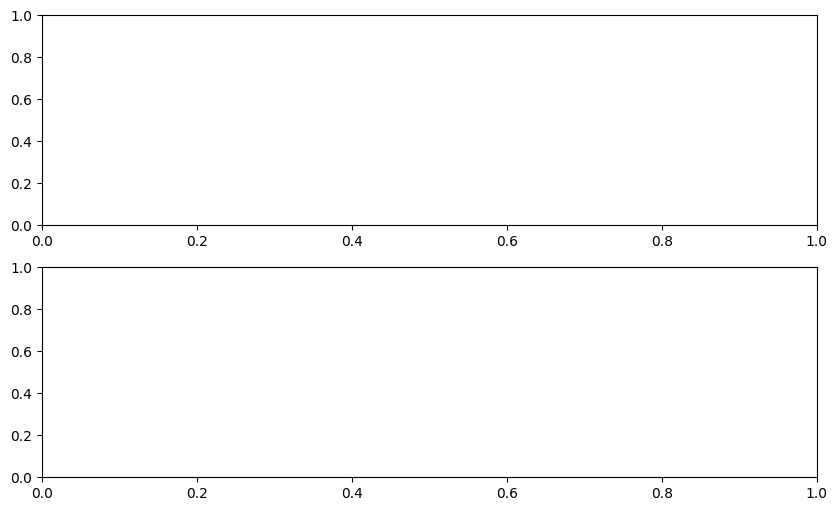

In [113]:
# time_classes = rating_df.value_counts("time_class").index
time_classes = ["bullet", 'blitz']

fig, axs = plt.subplots(len(time_classes), 1, figsize=(10,6), squeeze=False) # axs is a (1,2) nd-array

for i,time in enumerate(time_classes):
    #data and plot
    time_df = rating_df[rating_df["time_class"] == time]
    sns.lineplot(data=time_df, x=time_df.index, y=time_df.user_rating, ax=axs[i])
    
    x_ticks, x_locations = get_xticks_for_df(time_df)
    
    #plot aesthetic
    axs[i].set_xticks(x_locations[::2])
    axs[i].set_xticklabels(x_ticks[::2])
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].set_title(time)
                     